In [1]:
import pandas as pd
import numpy as np
import random as rnd
from pandas import DataFrame
import warnings
warnings.filterwarnings("ignore")
import shap
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datetime = pd.read_csv(r"D:\Le Hieu\Data Science\ekyc daytime.csv",parse_dates = ['Created'])
datetime['Created'] = pd.to_datetime(datetime['Created'],format ="%Y-%m-%d %H:%M:%S")
datetime

,Created,day,time,Landing Page URL,Exit Page URL,Referrer URL,Action Count,Page Count,Duration (seconds),Rage Clicked,U-Turned,Incoming Feedback,Net Promoter Score®,Hotjar User ID,New User,Country,Device,Browser,Operating System
0,2020-11-27 05:51:45,11/27/2020,5:51:45,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://www.google.com/,2,1,19,False,False,NaN,NaN,1ae0ca85,True,VN,Phone,Chrome,Android
1,2020-11-27 03:58:51,11/27/2020,3:58:51,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://invest.vcsc.com.vn/mo-tai-khoan-online...,NaN,1,1,6,False,False,NaN,NaN,233bd7a2,True,VN,Phone,Safari,Ios
2,2020-11-27 04:57:29,11/27/2020,4:57:29,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://adi.admicro.vn/adt/cpc/tvcads/2020/11/...,4,1,126,False,False,NaN,NaN,0d35e8bc,True,VN,Desktop,Coc,Windows
3,2020-11-27 04:11:14,11/27/2020,4:11:14,https://invest.vcsc.com.vn/mo-tai-khoan-online/,https://invest.vcsc.com.vn/mo-tai-khoan-online/,NaN,2,1,19,False,False,NaN,NaN,9506d9b6,True,VN,Desktop,Chrome,Windows
4,2020-11-27 04:09:52,11/27/2020,4:09:52,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://invest.vcsc.com.vn/mo-tai-khoan-online...,NaN,2,1,34,False,False,NaN,NaN,ddf625d8,True,VN,Phone,Safari,Ios
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2020-12-08 04:14:12,12/8/2020,4:14:12,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://m.cafef.vn,17,1,138,False,False,NaN,NaN,e3c2bf2b,False,VN,Phone,Facebook,Ios
1257,2020-12-08 10:05:48,12/8/2020,10:05:48,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://m.cafef.vn,59,1,410,False,False,NaN,NaN,dc0abfa4,True,VN,Phone,Safari,Ios
1258,2020-12-08 01:34:57,12/8/2020,1:34:57,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://invest.vcsc.com.vn/mo-tai-khoan-online...,NaN,36,4,174,False,False,NaN,NaN,d11afc41,True,VN,Phone,Chrome,Android
1259,2020-12-08 10:13:57,12/8/2020,10:13:57,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://cafef.vn/ekyc-dinh-danh-khach-hang-tru...,1,1,178,False,False,NaN,NaN,073421a3,True,VN,Desktop,Chrome,Windows


In [3]:
datetime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Created              1261 non-null   datetime64[ns]
 1   day                  1261 non-null   object        
 2   time                 1261 non-null   object        
 3   Landing Page URL     1261 non-null   object        
 4   Exit Page URL        1261 non-null   object        
 5   Referrer URL         900 non-null    object        
 6   Action Count         1261 non-null   int64         
 7   Page Count           1261 non-null   int64         
 8   Duration (seconds)   1261 non-null   int64         
 9   Rage Clicked         1261 non-null   bool          
 10  U-Turned             1261 non-null   bool          
 11  Incoming Feedback    0 non-null      float64       
 12  Net Promoter Score®  0 non-null      float64       
 13  Hotjar User ID       1261 non-nul

In [4]:
a = datetime.groupby('day').sum()

In [5]:
a = a.reset_index()
a

,day,Action Count,Page Count,Duration (seconds),Rage Clicked,U-Turned,Incoming Feedback,Net Promoter Score®,New User
0,11/27/2020,6087,451,77799,5.0,1.0,0.0,0.0,264.0
1,11/28/2020,3270,242,42728,2.0,1.0,0.0,0.0,128.0
2,11/29/2020,1882,161,29214,0.0,1.0,0.0,0.0,93.0
3,11/30/2020,2406,211,41402,1.0,1.0,0.0,0.0,125.0
4,12/1/2020,2295,174,38234,0.0,2.0,0.0,0.0,87.0
5,12/2/2020,1638,117,19973,0.0,0.0,0.0,0.0,63.0
6,12/3/2020,2384,138,38669,1.0,3.0,0.0,0.0,62.0
7,12/4/2020,970,70,18278,0.0,0.0,0.0,0.0,39.0
8,12/5/2020,647,53,15404,0.0,0.0,0.0,0.0,30.0
9,12/6/2020,538,44,12325,0.0,0.0,0.0,0.0,24.0


## Kiểm tra lượng user truy cập mới có giảm theo thời gian hay không

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

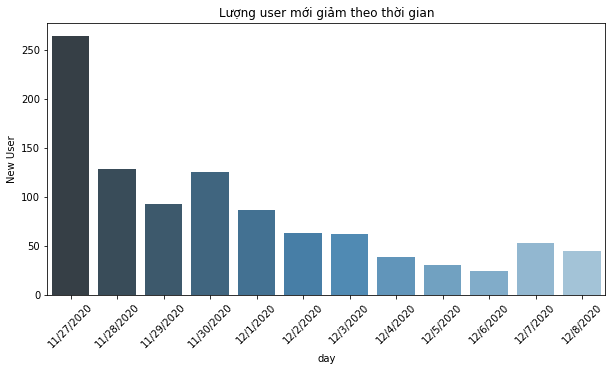

In [6]:
#fig, ax = plt.subplots(figsize = (12,6)
plt.figure(figsize=(10,5))
sns.barplot(x='day',y='New User',data = a,palette="Blues_d")
plt.title('Lượng user mới giảm theo thời gian')
plt.xticks(rotation=45)

## Kiểm tra nguồn traffic nào giảm theo thời gian

In [7]:
datetime.groupby('Referrer URL').count()

,Created,day,time,Landing Page URL,Exit Page URL,Action Count,Page Count,Duration (seconds),Rage Clicked,U-Turned,Incoming Feedback,Net Promoter Score®,Hotjar User ID,New User,Country,Device,Browser,Operating System
Referrer URL,,,,,,,,,,,,,,,,,,
http://fili.vn/,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1
http://m.facebook.com,12,12,12,12,12,12,12,12,12,12,0,0,12,12,12,12,12,12
http://m.facebook.com/,16,16,16,16,16,16,16,16,16,16,0,0,16,16,16,16,16,16
http://vinacorp.vn/,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1
http://www.google.com/,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.vcsc.com.vn/tin-chi-tiet/ngoi-tai-nha-pha-pha-mo-tai-khoan-voi-vcsc/371195?fbclid=IwAR2el7A65v_tl549-kZu52Ug4Y0JjQiNMUbJ21wYL_LE1zLCcDEzlgFSZ50,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1
https://www.vcsc.com.vn/tin-chi-tiet/ngoi-tai-nha-pha-pha-mo-tai-khoan-voi-vcsc/371195?fbclid=IwAR3LcQsuWFeDkzooZ4j8cb0IgRhX8Pg6pXvqxnFVp1I2L6zeAgJ5uL5nHYw,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1
https://www.vcsc.com.vn/tin-chi-tiet/ngoi-tai-nha-pha-pha-mo-tai-khoan-voi-vcsc/371195?zarsrc=30&utm_source=zalo&utm_medium=zalo&utm_campaign=zalo,2,2,2,2,2,2,2,2,2,2,0,0,2,2,2,2,2,2


#### Gộp các nguồn link

In [8]:
datetime = datetime.fillna('Direct')

In [9]:
df = datetime

In [10]:
df.loc[df['Referrer URL'].str.contains('google'), 'Referrer URL'] = 'google'
df.loc[df['Referrer URL'].str.contains('facebook'), 'Referrer URL'] = 'facebook'
df.loc[df['Referrer URL'].str.contains('zalo'), 'Referrer URL'] = 'zalo'
df.loc[df['Referrer URL'].str.contains('vcsc.com.vn'), 'Referrer URL'] = 'website vcsc'
df.loc[df['Referrer URL'].str.contains('fbclid'), 'Referrer URL'] = 'facebook'
df.loc[df['Referrer URL'].str.contains('fili'), 'Referrer URL'] = 'vietstock'
df.loc[df['Referrer URL'].str.contains('vinacorp'), 'Referrer URL'] = 'cafef'
df.loc[df['Referrer URL'].str.contains('cafef'), 'Referrer URL'] = 'cafef'
df.loc[df['Referrer URL'].str.contains('nhipcaudautu'), 'Referrer URL'] = 'nhipcaudautu'
df.loc[df['Referrer URL'].str.contains('youtube'), 'Referrer URL'] = 'youtube'
df.loc[df['Referrer URL'].str.contains('vietstock'), 'Referrer URL'] = 'vietstock'
df.loc[df['Referrer URL'].str.contains('cdn.'), 'Referrer URL'] = 'cafef'
df.loc[df['Referrer URL'].str.contains('linkedin'), 'Referrer URL'] = 'linkedin'
df.loc[df['Referrer URL'].str.contains('admicro'), 'Referrer URL'] = 'cafef'

In [11]:
df1 = []
df1 = pd.DataFrame(df1)
df1['day'] = df['day']
df1['Referrer URL'] = df['Referrer URL']
df1 = df1.set_index('day')
df1 = pd.get_dummies(df1)
df1 = df1.groupby('day').sum()
df1 = df1.reset_index()

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   day                        12 non-null     object
 1   Referrer URL_Direct        12 non-null     uint8 
 2   Referrer URL_cafef         12 non-null     uint8 
 3   Referrer URL_facebook      12 non-null     uint8 
 4   Referrer URL_google        12 non-null     uint8 
 5   Referrer URL_linkedin      12 non-null     uint8 
 6   Referrer URL_nhipcaudautu  12 non-null     uint8 
 7   Referrer URL_vietstock     12 non-null     uint8 
 8   Referrer URL_website vcsc  12 non-null     uint8 
 9   Referrer URL_youtube       12 non-null     uint8 
 10  Referrer URL_zalo          12 non-null     uint8 
dtypes: object(1), uint8(10)
memory usage: 344.0+ bytes


In [13]:
df1

,day,Referrer URL_Direct,Referrer URL_cafef,Referrer URL_facebook,Referrer URL_google,Referrer URL_linkedin,Referrer URL_nhipcaudautu,Referrer URL_vietstock,Referrer URL_website vcsc,Referrer URL_youtube,Referrer URL_zalo
0,11/27/2020,98,77,14,63,2,5,10,30,3,0
1,11/28/2020,25,49,7,46,0,0,7,15,4,0
2,11/29/2020,20,12,3,53,0,1,16,2,1,0
3,11/30/2020,49,7,5,71,0,0,15,8,0,1
4,12/1/2020,32,7,1,49,0,0,5,15,1,3
5,12/2/2020,21,6,1,36,0,0,1,15,1,0
6,12/3/2020,41,5,3,36,0,1,0,7,0,2
7,12/4/2020,14,4,0,19,0,0,1,8,1,2
8,12/5/2020,4,0,2,30,0,0,0,3,0,0
9,12/6/2020,3,1,0,26,0,0,1,0,0,0
